In [19]:
#Для загрузки файла в Collab

# from google.colab import files
# uploaded = files.upload()

In [1]:
pip install psycopg2 sqlalchemy pandas


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 9.6 MB/s eta 0:00:00


In [41]:
#Загрузка файла 

import pandas as pd

# Загружаем данные
salaries_df = pd.read_excel("salaries.xlsx", engine="openpyxl")

# Просматриваем первые строки
print(salaries_df.head())

  employee_id first_name last_name     salary
0     1692406        NaN       NaN   55725.24
1     1527750        NaN       NaN  139174.88
2     1527991     Caylen     Forde  245879.12
3         NaN        NaN       NaN  101494.34
4         NaN        NaN       NaN  101345.12


In [86]:
#Загруза данных из PostgresSQL

import pandas as pd
from sqlalchemy import create_engine

# Параметры подключения
DB_USER = "postgres"
DB_PASSWORD = ""
DB_HOST = "localhost"
DB_PORT = "5432"
DB_NAME = "st_89"

# Подключение к базе
engine = create_engine(f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")


bonus = "SELECT * FROM bonuses;"
bonuses_df = pd.read_sql(bonus, engine)

personal = "SELECT * FROM personal_data;"
employees_personal_df = pd.read_sql(personal, engine)


In [45]:
print(bonuses_df)

     employee_id     bonus
0        1692406  23508.90
1        1527750  23508.90
2        1527991  23508.90
3                 23508.90
4                 23508.90
...          ...       ...
3211     1694778  20415.03
3212      333482  23508.90
3213      379301      0.00
3214      386980  23508.90
3215      456605  10028.73

[3216 rows x 2 columns]


In [47]:
print(employees_personal_df)

     employee_id        first_name      last_name Date Of Birth  Gender  \
0        1692406                                                   Male   
1        1527750                                                   Male   
2        1527991            Caylen          Forde    1984-07-20  Female   
3                                                                  Male   
4                                                                  Male   
...          ...               ...            ...           ...     ...   
3211     1694778          Shi Ling            Lee    1995-05-21  Female   
3212      333482  FRANCISCO JAVIER  SIMON GARRIDO    1965-04-22    Male   
3213      379301         Elizabeth       La Fleur    1975-11-28  Female   
3214      386980           Eduardo        Garriga    1983-07-21    Male   
3215      456605             Tracy             Xu    1983-12-26  Female   

        Country  
0         Italy  
1        Turkey  
2        Turkey  
3         Italy  
4        

In [57]:
import pandas as pd
#Очиска данных оклада
# Удаляем строки, где нет ID или оклада
salaries_df.dropna(subset=["employee_id", "salary"], inplace=True)

# Удаляем отрицательные оклады (если есть)
salaries_df = salaries_df[salaries_df["salary"] >= 0]

salaries_df_new = salaries_df

print("Данные по окладу изменены")

# Очистка данных премий

# Удаляем строки без ID или бонуса
bonuses_df.dropna(subset=["employee_id", "bonus"], inplace=True)

# Удаляем отрицательные бонусы
bonuses_df = bonuses_df[bonuses_df["bonus"] >= 0]

# Сохраняем очищенные данные
bonuses_df_new = bonuses_df

print("Данные по премиальным изменены")

# Очистка персональных данных
# Удаляем строки без ID, имени или даты рождения
employees_personal_df.dropna(subset=["employee_id", "first_name", "last_name", "Date Of Birth"], inplace=True)

# Проверяем корректность дат
employees_personal_df["Date Of Birth"] = pd.to_datetime(employees_personal_df["Date Of Birth"], errors="coerce")

# Удаляем строки с некорректными датами рождения
employees_personal_df.dropna(subset=["Date Of Birth"], inplace=True)

# Проверяем корректность значений в колонке "Gender"
valid_genders = ["Male", "Female", "Other"]
employees_personal_df = employees_personal_df[employees_personal_df["Gender"].isin(valid_genders)]

# Сохраняем очищенные данные
personal_data_df_new = employees_personal_df

print("Персональные данные изменены")

Данные по окладу изменены
Данные по премиальным изменены
Персональные данные изменены


In [88]:
import pandas as pd

# Объединяем персональные данные с окладами по employee_id
merged_df = pd.merge(personal_data_df_new, salaries_df_new, on="employee_id", how="inner")

# Добавляем бонусы (inner join, чтобы не было пропущенных данных)
merged_df = pd.merge(merged_df, bonuses_df_new, on="employee_id", how="left")


# Добавляем колонку с итоговой зарплатой
merged_df["total_salary"] = merged_df["salary"] + merged_df["bonus"]

# print(merged_df)

# Сохраняем итоговый отчет
merged_df.to_excel("final_salary_report.xlsx", index=False, engine="openpyxl")

import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')

logging.info("Запуск процесса загрузки данных...")
logging.info("Очистка данных завершена...")
logging.info("Итоговый отчет создан.")

print("Итоговый отчет final_salary_report.xlsx успешно создан!")

2025-03-31 14:05:45,358 - Запуск процесса загрузки данных...
2025-03-31 14:05:45,359 - Очистка данных завершена...
2025-03-31 14:05:45,360 - Итоговый отчет создан.


Итоговый отчет final_salary_report.xlsx успешно создан!


#Анализ и статистика данных

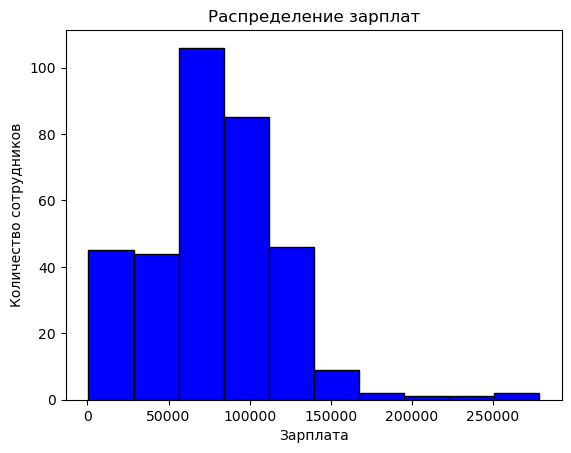

Статистика по данным:
Общее количество сотрудников: 341
Количество уникальных ID: 341
Средняя зарплата: 77560.04
Средний бонус: 15936.15


In [84]:
import matplotlib.pyplot as plt

# Гистограмма распределения зарплат
plt.hist(merged_df['salary'], bins=10, color='blue', edgecolor='black')
plt.title("Распределение зарплат")
plt.xlabel("Зарплата")
plt.ylabel("Количество сотрудников")
plt.show()

print("Статистика по данным:")
print(f"Общее количество сотрудников: {len(merged_df)}")
print(f"Количество уникальных ID: {merged_df['employee_id'].nunique()}")
print(f"Средняя зарплата: {merged_df['salary'].mean():.2f}")
print(f"Средний бонус: {merged_df['bonus'].mean():.2f}")